# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [4]:
# Informative charater labels
da['DMDMARTL_decoded'] = da['DMDMARTL'].replace({1:'Married', 2:'Widowed', 3:'Divorced', 4:'Separated', 5:'Never married',
                       6:'Living with partner', 77:'Refused', 99:"Don't Know", np.nan: 'Missing'})
da['DMDMARTL_decoded'].unique()

array(['Married', 'Divorced', 'Living with partner', 'Separated',
       'Never married', 'Missing', 'Widowed', 'Refused'], dtype=object)

In [5]:
# Frequency table for all people
print(da['DMDMARTL_decoded'].value_counts())
print()
# Frequency table for Women only
print(da.loc[da['RIAGENDR'] == 2, 'DMDMARTL_decoded'].value_counts())
print()
# Frequency table for Men only
print(da.loc[da['RIAGENDR'] == 1, 'DMDMARTL_decoded'].value_counts())

DMDMARTL_decoded
Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: count, dtype: int64

DMDMARTL_decoded
Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: count, dtype: int64

DMDMARTL_decoded
Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: count, dtype: int64


In [6]:
# Frequency table for all people
print(da['DMDMARTL_decoded'].value_counts())
print()
# Frequency table for Women only
print(da.loc[da['RIAGENDR'] == 2, 'DMDMARTL_decoded'].value_counts())
print()
# Frequency table for Men only
print(da.loc[da['RIAGENDR'] == 1, 'DMDMARTL_decoded'].value_counts())

DMDMARTL_decoded
Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: count, dtype: int64

DMDMARTL_decoded
Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: count, dtype: int64

DMDMARTL_decoded
Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: count, dtype: int64


In [7]:
# Frequency table for all people
print('Frequency tabel for all people')
print(da['DMDMARTL_decoded'].value_counts())
print()
# Frequency table for Women only
print('Frequency table for women only')
print(da.loc[da['RIAGENDR'] == 2, 'DMDMARTL_decoded'].value_counts())
print()
# Frequency table for Men only
print('Frequency table for men only')
print(da.loc[da['RIAGENDR'] == 1, 'DMDMARTL_decoded'].value_counts())

Frequency tabel for all people
DMDMARTL_decoded
Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: count, dtype: int64

Frequency table for women only
DMDMARTL_decoded
Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: count, dtype: int64

Frequency table for men only
DMDMARTL_decoded
Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: count, dtype: int64


In [8]:
# Three frequency tables using only people whose age is between 30 and 40.
print('Frequency tabel for all people (30 < age < 40)')
print(da[(da.RIDAGEYR.between(30,40))]['DMDMARTL_decoded'].value_counts())
print()
# Frequency table for Women only
print('Frequency table for women only (30 < age < 40)')
print(da[(da.RIAGENDR == 2) & (da.RIDAGEYR.between(30,40))]['DMDMARTL_decoded'].value_counts())
print()
# Frequency table for Men only
print('Frequency table for men only (30 < age < 40)')
print(da[(da.RIAGENDR == 1) & (da.RIDAGEYR.between(30,40))]['DMDMARTL_decoded'].value_counts())

Frequency tabel for all people (30 < age < 40)
DMDMARTL_decoded
Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: count, dtype: int64

Frequency table for women only (30 < age < 40)
DMDMARTL_decoded
Married                285
Never married          116
Living with partner     65
Divorced                46
Separated               18
Widowed                  2
Name: count, dtype: int64

Frequency table for men only (30 < age < 40)
DMDMARTL_decoded
Married                275
Never married          101
Living with partner     78
Divorced                24
Separated               12
Widowed                  3
Refused                  1
Name: count, dtype: int64


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

[Text(0, 0, 'Men'), Text(1, 0, 'Women')]

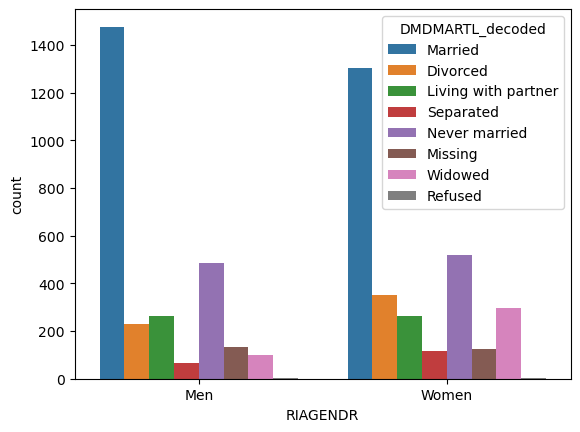

In [9]:
ax = sns.countplot(data=da, hue='DMDMARTL_decoded', x='RIAGENDR')
ax.set_xticklabels(['Men','Women'])

As per my observation, the most men and women are married. The number of widowed is mostly found in women.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

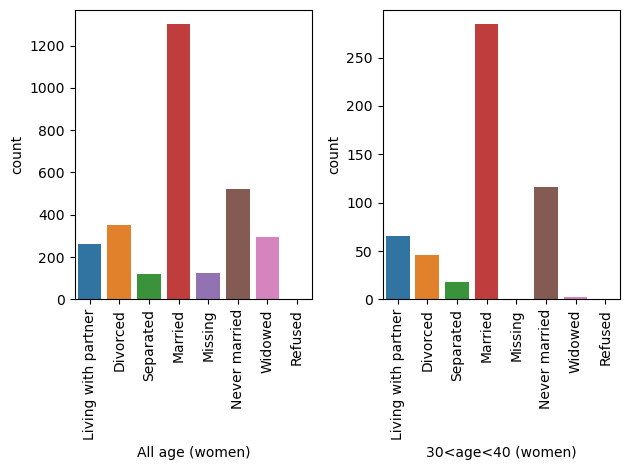

In [10]:
women_all = da[da.RIAGENDR == 2]
order = women_all.DMDMARTL_decoded.unique()
women_30_40 = da[(da.RIAGENDR == 2) & (da.RIDAGEYR.between(30,40))]
fig, ax = plt.subplots(ncols=2)
sns.countplot(data=women_all, x='DMDMARTL_decoded', ax=ax[0], order=order)
sns.countplot(data=women_30_40, x='DMDMARTL_decoded', ax=ax[1], order=order)
ax[0].set_xlabel('All age (women)')
ax[1].set_xlabel('30<age<40 (women)')
[ax[i].tick_params(axis='x', rotation=90) for i in range(2)]
plt.tight_layout()
plt.show()

The number of widowed is very less in the range of age between 30 and 40. Moreover, There is no "Missing" count in the age between 30 and 40 comapred with all age.

__Q1c.__ Repeat part b for the men.

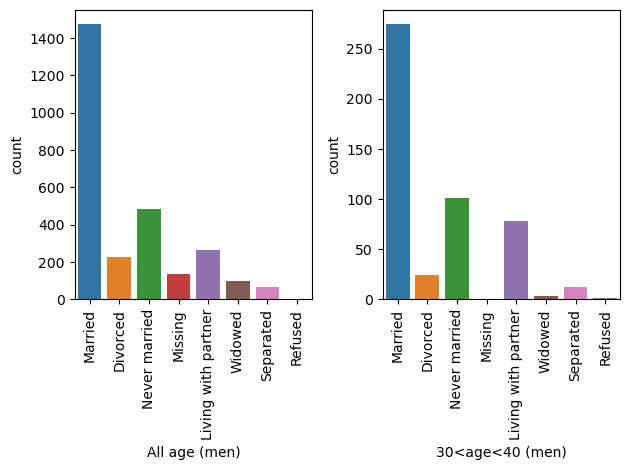

In [11]:
men_all = da[da.RIAGENDR == 1]
order = men_all.DMDMARTL_decoded.unique()
men_30_40 = da[(da.RIAGENDR == 1) & (da.RIDAGEYR.between(30,40))]
fig, ax = plt.subplots(ncols=2)
sns.countplot(data=men_all, x='DMDMARTL_decoded', ax=ax[0], order=order)
sns.countplot(data=men_30_40, x='DMDMARTL_decoded', ax=ax[1], order=order)
ax[0].set_xlabel('All age (men)')
ax[1].set_xlabel('30<age<40 (men)')
[ax[i].tick_params(axis='x', rotation=90) for i in range(2)]
plt.tight_layout()
plt.show()

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

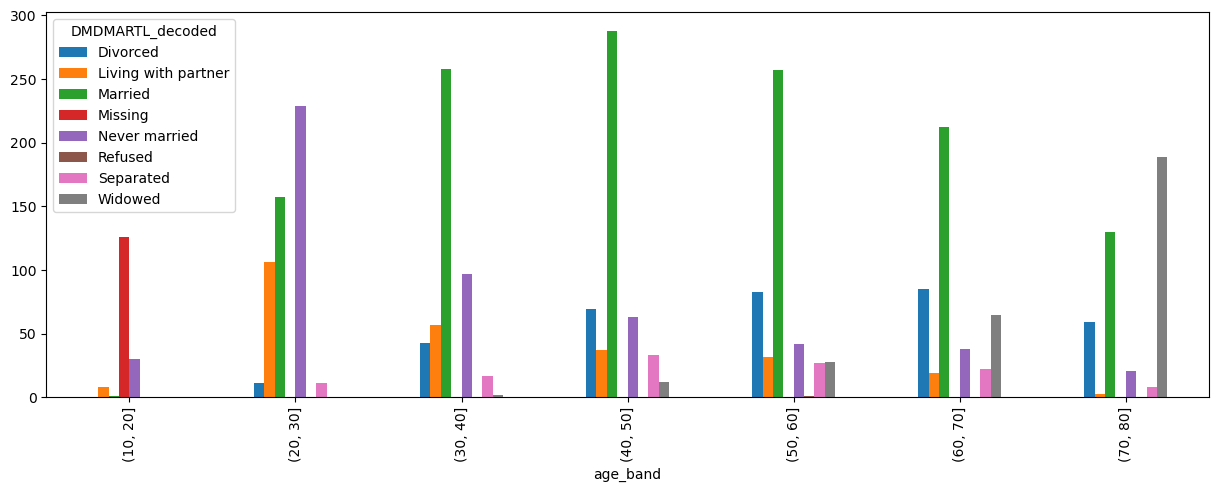

In [67]:
# Binning
da.loc[:, 'age_band'] = pd.cut(da.RIDAGEYR, [10,20,30,40,50,60,70,80])

# Restrict female population
da_female = da[da.RIAGENDR == 2]
da_male = da[da.RIAGENDR == 1]


# Plotting
da_female.groupby(['age_band','DMDMARTL_decoded']).size().unstack(fill_value=0).plot.bar(figsize = (15,5))
plt.show()

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

We notice that both men and women are married starting from age 30. The rate of living with partner is decreased along the age.
In female, widowed counts are significantly increased after 60-70 age-range. I

__Q2b.__ Repeat the construction for males.

/tmp/ipykernel_10814/3586787180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_male.loc[:, 'age_band'] = pd.cut(da_male.RIDAGEYR, [10,20,30,40,50,60,70,80])


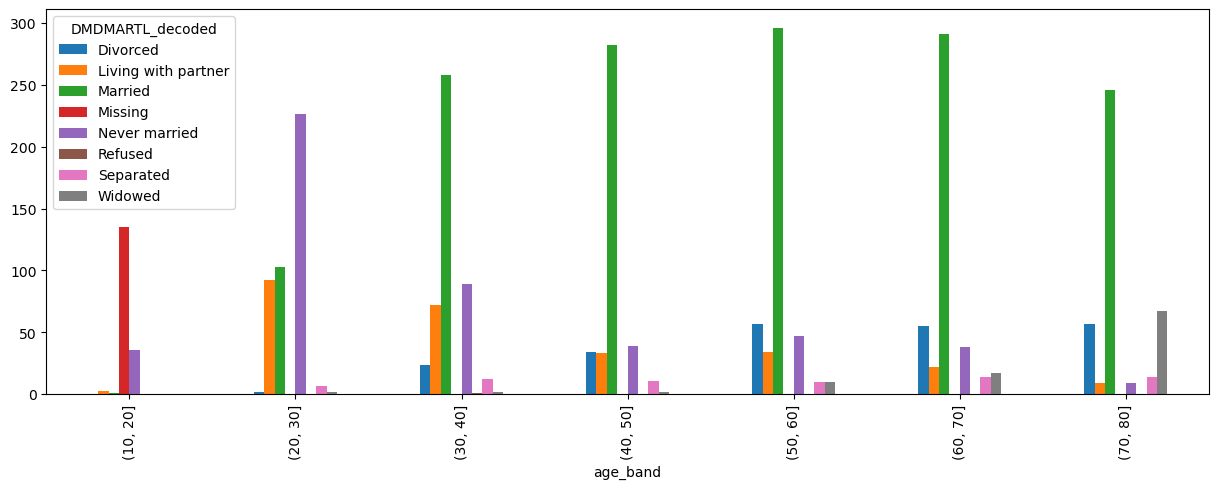

In [13]:
# Restrict female population
da_male = da[da.RIAGENDR == 1]

# Binning age into age_bands
da_male.loc[:, 'age_band'] = pd.cut(da_male.RIDAGEYR, [10,20,30,40,50,60,70,80])

# Plotting
da_male.groupby(['age_band','DMDMARTL_decoded']).size().unstack(fill_value=0).plot.bar(figsize = (15,5))
plt.show()

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

<Axes: >

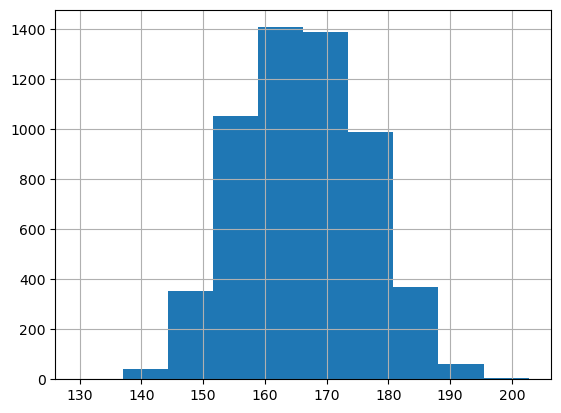

In [14]:
da['BMXHT'].hist()

/tmp/ipykernel_10814/3398604230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da['BMXHT'])


<Axes: xlabel='BMXHT', ylabel='Density'>

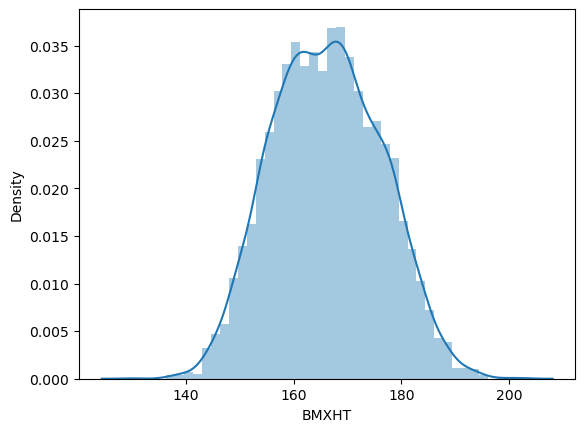

In [15]:
sns.distplot(da['BMXHT'])

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

/tmp/ipykernel_10814/2598322100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da['BMXHT'], bins=30)


<Axes: xlabel='BMXHT', ylabel='Density'>

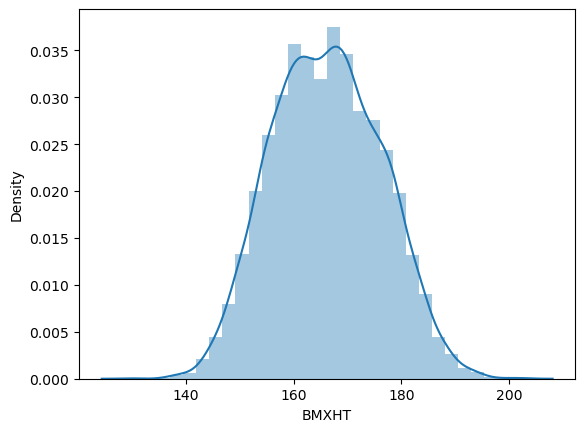

In [16]:
sns.distplot(da['BMXHT'], bins=30)

The default value of bins gives a meaningful result because when we put kde=True, we get a fair idea of why the distribution has a slight dip at the top and how it goes down on either sides. When the number of bins increases, the distribution initially seems to make more sense but at excessively high number of bins, it makes no sense at all. Same goes for excessively low number of bins, it does not give enough information on why the distribution is shaped the way it is as it appears it should be uniformly distributed with very few bins.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

In [23]:
da['gender'] = da['RIAGENDR'].replace({1: 'Female', 2: 'Male'})
da['gender'].value_counts()

gender
Male      2976
Female    2759
Name: count, dtype: int64

/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


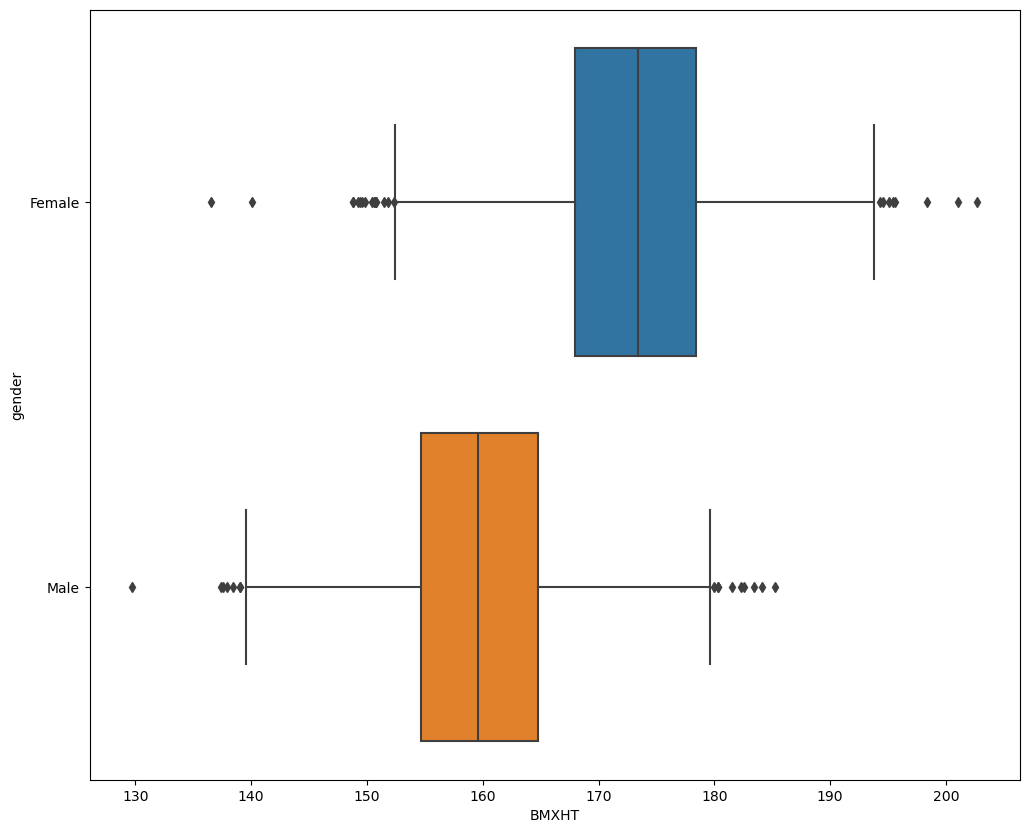

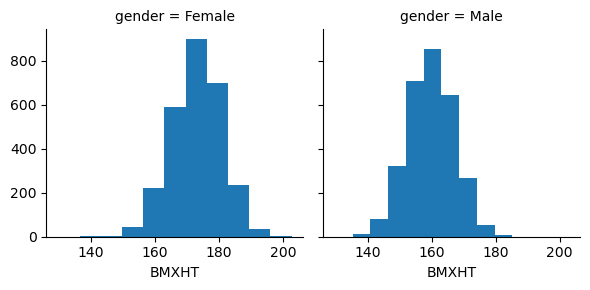

In [31]:
da['gender'] = da['RIAGENDR'].replace({1: 'Female', 2: 'Male'})
plt.figure(figsize=(12,10))
a = sns.boxplot(x=da['BMXHT'], y=da['gender']) # Separate "box-plot'

g = sns.FacetGrid(data=da, col='gender') # Multi-plot grid for plotting conditional relationships.
g.map(plt.hist, "BMXHT") # Map "plt.hist" to g "FacetGrid"
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

<Axes: >

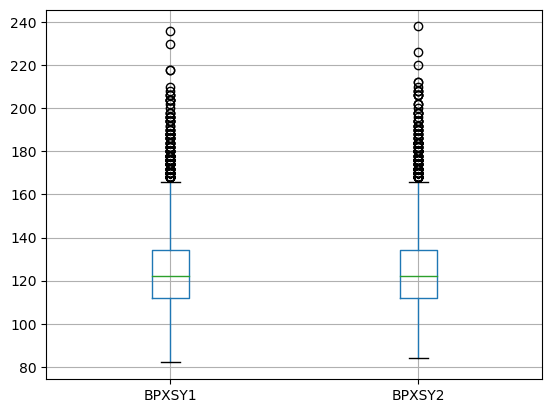

In [33]:
boxes = da[['BPXSY1', 'BPXSY2']]
boxes.boxplot()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [38]:
((da['BPXSY1'] - da['BPXSY2']) < 0).mean()

0.3412380122057541

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

In [ ]:
# insert your code here

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: >, <Axes: >]], dtype=object)

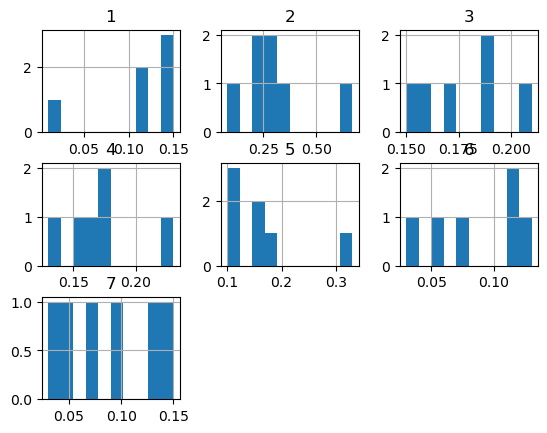

In [61]:
replacement = {1:'Less than 9th grade', 2:'9-11th grade (Includes 12th grade with no diploma)', 
               3:'High school graduate/GED or equivalent', 4:'Some college or AA degree', 
               5:'College graduate or above', 7:'Refused', 9:"Don't Know", np.nan:'Missing'}
da['DMDEDUC2_r'] = da.DMDEDUC2.replace(replacement)
dfreq = da.groupby(['DMDEDUC2_r', 'DMDHHSIZ']).size().unstack()
dfreq = dfreq.apply(lambda x: round(x/x.sum(),2), axis=1)
dfreq.hist()

In [49]:
da.DMDHHSIZ

0       2
1       1
2       2
3       1
4       5
       ..
5730    1
5731    3
5732    1
5733    5
5734    3
Name: DMDHHSIZ, Length: 5735, dtype: int64

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [94]:
da_op = da[da.RIDAGEYR.between(30,40, inclusive='neither')]
da_op.groupby(['DMDEDUC2', 'gender']) ['DMDHHSIZ'].median()

DMDEDUC2  gender
1.0       Female    5.0
          Male      5.0
2.0       Female    5.0
          Male      5.0
3.0       Female    4.0
          Male      5.0
4.0       Female    4.0
          Male      4.0
5.0       Female    3.0
          Male      4.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [115]:
((da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])[['RIDAGEYR','BMXHT','BMXBMI']].mean())).unstack()

RIDAGEYR                  BMXHT                 BMXBMI  \
RIAGENDR                  1          2           1           2          1   
SDMVSTRA SDMVPSU                                                            
119      1        47.861111  47.663265  172.741667  159.570408  26.958333   
         2        54.363636  52.987952  172.906818  159.244578  27.160465   
120      1        43.130000  43.636364  169.537755  155.402041  30.939175   
         2        45.219178  43.736111  173.075342  159.218056  27.727397   
121      1        46.750000  44.397959  172.177885  158.871579  29.416505   
         2        42.063158  44.376344  174.764516  160.229032  26.273118   
122      1        44.653061  42.897436  173.998969  161.315385  28.528866   
         2        44.320000  47.333333  170.332323  157.231111  25.744444   
123      1        47.829787  44.841121  174.315217  162.059615  29.231522   
         2        52.126582  46.457447  174.454430  160.476596  28.811392   
124      1        50.750000  51.664000  172.109009  158.788710  28.614414   
         2        48.245614  42.541667  174.291228  162.853521  27.714035   
125      1        55.165289  50.900901  173.631092  160.762385  29.727731   
         2        49.705882  51.660000  174.456863  160.021429  29.143564   
126      1        48.416667  46.229167  175.149398  160.387500  29.033333   
         2        48.666667  47.205882  174.713043  160.892000  29.039130   
127      1        53.137931  49.694444  171.545349  157.422430  31.062353   
         2        54.070588  51.486239  173.366667  159.022936  30.557831   
128      1        53.673267  55.638462  169.325000  156.339063  31.749000   
         2        45.822785  45.589744  172.400000  160.437179  26.835443   
129      1        43.922222  45.329787  171.094318  156.900000  26.493182   
         2        45.775510  43.500000  173.138298  161.034259  28.961702   
130      1        50.516854  47.810526  176.974157  161.977895  30.337079   
         2        50.535354  50.833333  175.061224  160.060577  29.237755   
131      1        53.140187  54.893617  175.610476  161.989362  28.259615   
         2        46.778846  45.000000  175.091346  161.673810  30.077885   
132      1        42.380435  43.210526  172.534066  161.508421  28.546154   
         2        49.038760  51.700000  172.809524  159.138281  28.966667   
133      1        44.054795  45.105882  171.509722  158.295122  27.495833   
         2        47.489796  47.063158  171.179167  158.627368  27.966667   

                             
RIAGENDR                  2  
SDMVSTRA SDMVPSU             
119      1        30.052041  
         2        27.849398  
120      1        32.419388  
         2        27.400000  
121      1        30.856842  
         2        26.470968  
122      1        29.447436  
         2        26.611111  
123      1        29.905769  
         2        30.641489  
124      1        29.533065  
         2        28.640845  
125      1        30.385321  
         2        28.564286  
126      1        31.262500  
         2        29.612121  
127      1        32.189720  
         2        30.770642  
128      1        32.303125  
         2        27.491026  
129      1        29.019149  
         2        29.429630  
130      1        30.700000  
         2        31.490385  
131      1        30.061702  
         2        32.984127  
132      1        29.848421  
         2        30.540625  
133      1        27.959259  
         2        29.000000

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [119]:
((da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])[['RIDAGEYR','BMXHT','BMXBMI']].quantile(.75)) \
- (da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])[['RIDAGEYR','BMXHT','BMXBMI']].quantile(.25))).unstack()

RIDAGEYR          BMXHT         BMXBMI        
RIAGENDR                1      2       1       2      1       2
SDMVSTRA SDMVPSU                                               
119      1          29.75  31.25   9.000   9.325  5.350   9.750
         2          29.00  33.50  11.225   9.950  5.300   9.350
120      1          23.75  26.50  12.125   8.750  9.400   8.775
         2          26.00  25.75  10.500  10.550  7.100   7.750
121      1          34.50  26.25  10.725   9.150  7.500   9.000
         2          25.50  26.00   8.600   9.600  5.700   8.100
122      1          29.50  24.00   9.400  10.400  7.700   9.875
         2          30.00  25.00  10.150   7.575  4.100   8.475
123      1          28.25  30.50   9.350   9.675  8.050  10.450
         2          31.50  34.50   9.900  11.200  8.100   9.975
124      1          32.00  27.00   9.800   8.375  6.100   8.950
         2          31.00  23.50  11.600   8.650  8.700   9.000
125      1          29.00  31.00  10.350   9.100  8.300   8.000
         2          33.50  32.25   7.925  10.675  7.900  10.325
126      1          36.25  30.25  10.450   8.500  8.000  10.675
         2          34.00  31.75   8.125  12.025  6.850  10.350
127      1          30.00  27.25   9.025   7.700  8.200  11.750
         2          28.00  30.00  10.750  11.600  5.950   9.200
128      1          33.00  28.00   9.950   9.125  6.675   8.500
         2          25.50  22.00   9.850  10.650  5.800   9.375
129      1          20.75  24.75  12.300  10.375  6.025   9.500
         2          30.75  26.25  10.700   8.900  5.800   9.725
130      1          36.00  35.50   9.900   8.650  6.700  11.200
         2          28.50  30.25   8.625  10.225  8.375   8.050
131      1          36.00  35.75  10.500  10.025  7.525  11.075
         2          28.00  24.00   7.750   7.575  7.850  10.625
132      1          21.25  30.00  10.600  10.950  6.600  10.700
         2          38.00  33.00  10.550  10.100  9.600  11.750
133      1          33.00  34.00   8.925  10.300  6.425   8.300
         2          32.25  28.50   8.850   9.550  5.900   9.650

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.